In [30]:
"""
Name: con_contact_tracing.ipynb
Authors: Stephan Meighen-Berger
Checks the efficiency of contact tracing
"""

import cProfile, pstats, io
import pandas as pd
from pstats import SortKey
%load_ext autoreload
%autoreload 2
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
import scipy.sparse
from tqdm import tqdm
import scipy.stats
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Adding path to module
sys.path.append("../")

# Module imports
from core.contagion import CONTAGION, CON_population
from core.con_config import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
config["debug_level"] = 0
infected=10
config["population size"] = 10000
config["average social circle"] = 5
#contagion = CONTAGION(infected, config=config, rstate=np.random.RandomState(1337))
pr = cProfile.Profile()
pr.enable()
pop = CON_population(10000, rstate=np.random.RandomState(1337))
pr.disable()


Done constructing population


In [16]:
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
#print(s.getvalue())

In [37]:
pr = cProfile.Profile()
config["population size"] = 10000
config["average social circle"] = 10
infected=10
tracking_fractions = [0., 0.2, 0.4, 0.6]
results = []
results_infected = []
all_stats = []
for tracked_fraction in tqdm(tracking_fractions):
    config['measures'] = 'contact tracing'
    config['tracked'] = tracked_fraction
    contagion = CONTAGION(infected, rstate=np.random.RandomState(1337))
    # Storing the solutions
    mc_run = contagion.sim()
    stats = pd.DataFrame(mc_run.statistics)
    all_stats.append(stats)


  0%|          | 0/4 [00:00<?, ?it/s]


Done constructing population


 25%|██▌       | 1/4 [00:08<00:25,  8.41s/it]


Done constructing population


 50%|█████     | 2/4 [00:19<00:18,  9.10s/it]


Done constructing population


 75%|███████▌  | 3/4 [00:31<00:10, 10.21s/it]


Done constructing population


100%|██████████| 4/4 [00:47<00:00, 11.76s/it]

In [ ]:
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

In [19]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

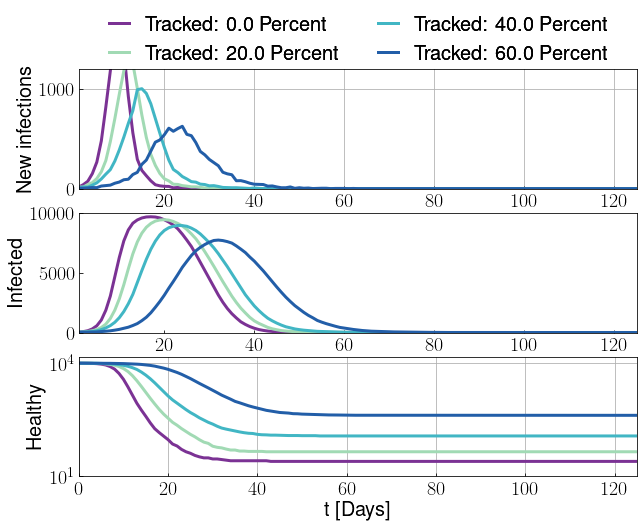

In [40]:


# Infections per time step
figure, (ax1, ax2, ax3) = plt.subplots(3, 1 ,figsize=(std_size, std_size * 6. / 8.))
colors = [
    '#7b3294',
    '#a1dab4',
    '#41b6c4',
    '#225ea8']
high_x = 125
#  New infections
for i, tracked_fraction in enumerate(tracking_fractions):
    stats = all_stats[i]
    ax1.plot(contagion.t, stats["succesful_infections"], color=colors[i],
            lw=lw, label='Tracked: %.1f Percent' %(tracked_fraction*100.))
ax1.set_xlim(1e0, high_x)
ax1.set_ylim(0., 1200)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
# ax1.set_xlabel(r't [Days]', fontsize=fontsize)
ax1.set_ylabel(r'New infections', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.6),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.grid(True)
# Infection total
for i, tracked_fraction in enumerate(tracking_fractions):
    stats = all_stats[i]
    ax2.plot(contagion.t, stats["infected"], color=colors[i],
            lw=lw)
ax2.set_xlim(1e0, high_x)
ax2.set_ylim(0., 10000)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_xlabel(r't [Days]', fontsize=fontsize)
ax2.set_ylabel(r'Infected', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# Healthy
for i, tracked_fraction in enumerate(tracking_fractions):
    stats = all_stats[i]
    ax3.plot(contagion.t,
             stats["healthy"],
             lw=lw, color=colors[i],)
ax3.set_xlim(0., high_x)
ax3.set_ylim(10, 1.5e4)
ax3.set_xscale('linear')
ax3.set_yscale('log')
ax3.set_xlabel(r't [Days]', fontsize=fontsize)
ax3.set_ylabel(r'Healthy', fontsize=fontsize)
ax3.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax3.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax3.grid(True)
plt.show()

In [41]:
figure.savefig("Contagion_Contact_Tracing.png", bbox_inches='tight')

In [ ]:
contagion.R

In [22]:
np.cumsum(results[i])

array([    5,    12,    17,    19,    30,    38,    55,    90,   131,
         181,   243,   324,   439,   555,   715,   947,  1233,  1590,
        2043,  2534,  3094,  3744,  4413,  5134,  5761,  6336,  6866,
        7383,  7781,  8166,  8479,  8737,  8988,  9170,  9331,  9443,
        9543,  9618,  9684,  9745,  9802,  9832,  9870,  9889,  9919,
        9939,  9958,  9972,  9988,  9992, 10002, 10011, 10019, 10021,
       10025, 10035, 10038, 10041, 10045, 10047, 10050, 10050, 10052,
       10052, 10052, 10053, 10053, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054, 10054,
       10054, 10054,